<a href="https://colab.research.google.com/github/L4ncelot1024/Learn_Deep_Learning_Le_Wagon/blob/main/Day4/01_First_Convolutions_CHALLENGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  %tensorflow_version 2.x

In [3]:
from PIL import Image
import os
from skimage.transform import resize

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kp_image

print(f'Tensorflow version {tf.__version__}')

Tensorflow version 2.4.1


## CNN Filter

Here we'll manipulate some basic CNN filters to see how they can affect an image

### Downloading & Preparing Data

In [4]:
# First load the image: here we download a zebra and a dog images and save it in a temporary folder so we can use it
# (feel free to re-use this method later on to test on any image)

img_dir = '/tmp/imgs'
if not os.path.exists(img_dir):
    os.makedirs(img_dir)
!wget -O /tmp/imgs/zebra.jpg https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL458223_sjvgvt.jpg
!wget -O /tmp/imgs/dog.jpg https://source.unsplash.com/K4mSJ7kc0As
!wget -O /tmp/imgs/bird.jpg https://source.unsplash.com/Q-8jreAEa-4




--2021-05-20 11:49:19--  https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL458223_sjvgvt.jpg
Resolving res.cloudinary.com (res.cloudinary.com)... 104.71.48.52, 2600:140e:6:9bd::523, 2600:140e:6:9be::523
Connecting to res.cloudinary.com (res.cloudinary.com)|104.71.48.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241331 (236K) [image/jpeg]
Saving to: ‘/tmp/imgs/zebra.jpg’

/tmp/imgs/zebra.jpg 100%[===================>] 235.67K  --.-KB/s    in 0.05s   

2021-05-20 11:49:19 (4.57 MB/s) - ‘/tmp/imgs/zebra.jpg’ saved [241331/241331]

--2021-05-20 11:49:19--  https://source.unsplash.com/K4mSJ7kc0As
Resolving source.unsplash.com (source.unsplash.com)... 23.21.210.117, 54.225.155.188, 23.21.181.157
Connecting to source.unsplash.com (source.unsplash.com)|23.21.210.117|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://images.unsplash.com/photo-1518020382113-a7e8fc38eac9?crop=entropy&cs=ti

In [5]:
# [EXTRA] If you want to download an other image, you just need to execute the command above with the URL
# of your image !

In [6]:
zebra_path = '/tmp/imgs/zebra.jpg'
dog_path = '/tmp/imgs/dog.jpg'
bird_path = '/tmp/imgs/bird.jpg'

zebra_img = Image.open(zebra_path)
dog_img = Image.open(dog_path)
bird_img = Image.open(bird_path)

img_list = [zebra_img, dog_img, bird_img ]
nb_img = len(img_list)

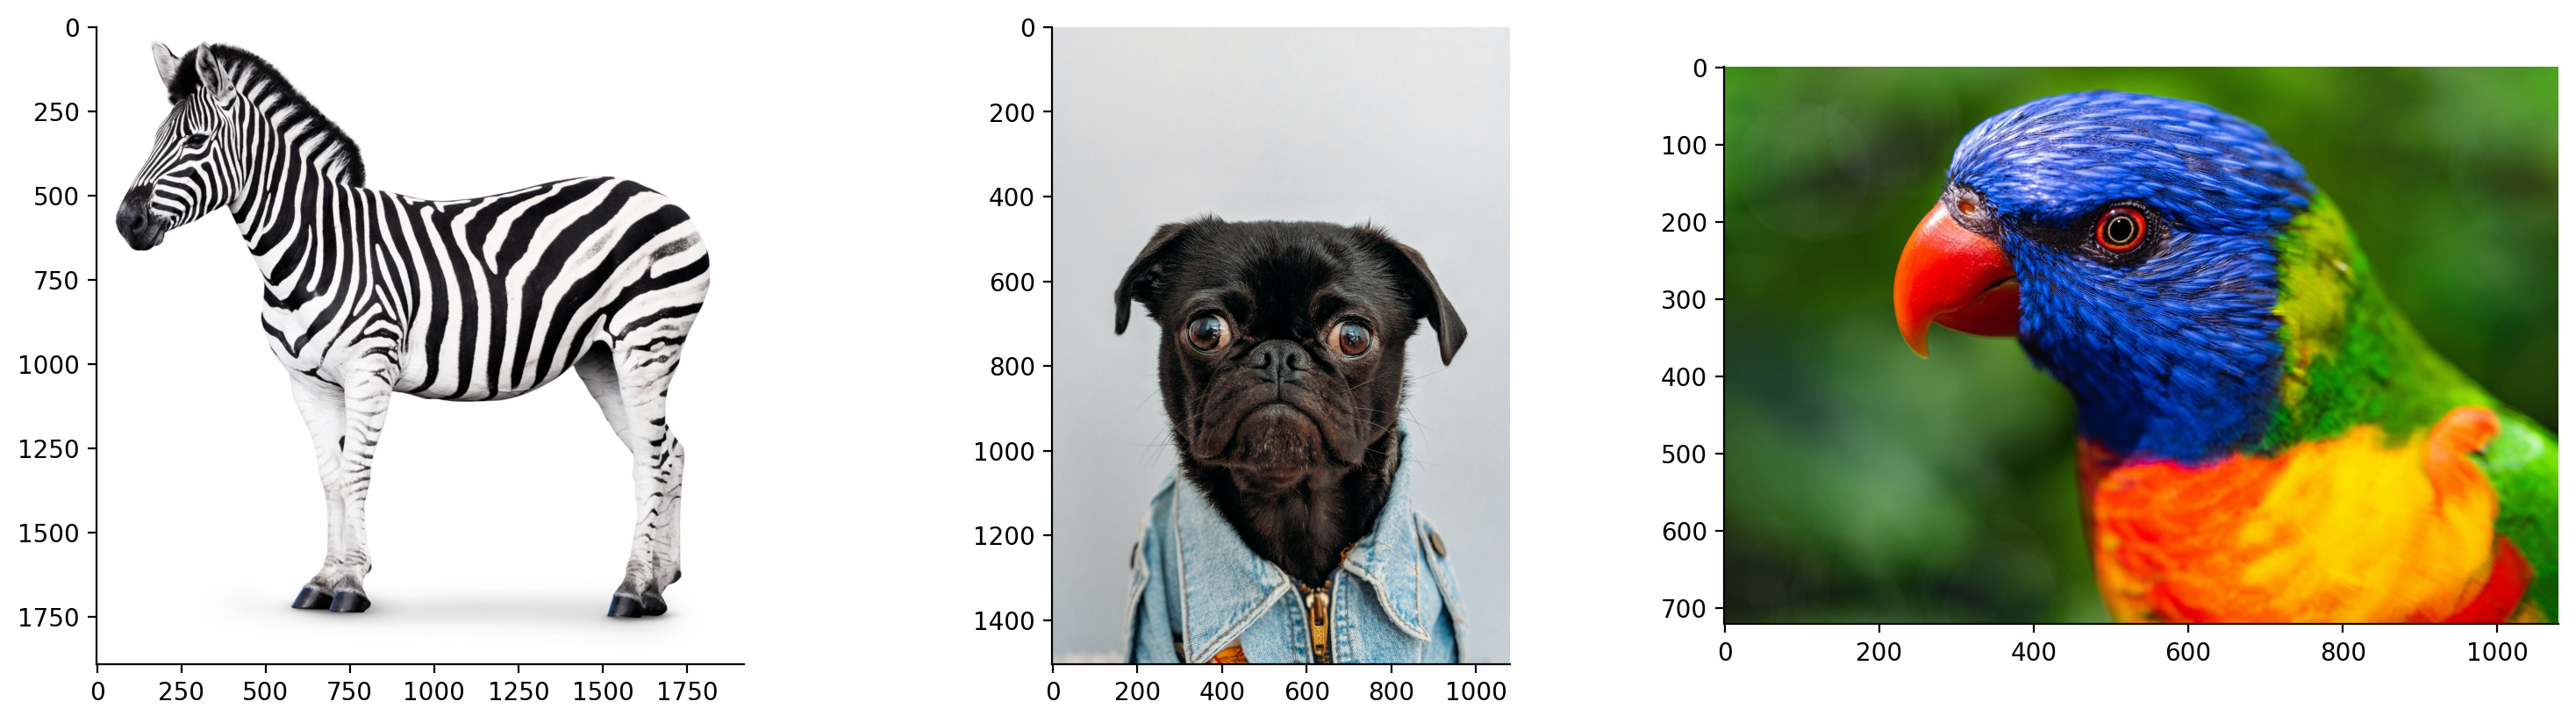

In [7]:
def plot_my_img(list_of_img, my_dpi = 200,cmap="viridis"):
  nb = len(list_of_img)
  fig = plt.figure(figsize=(15, 8), dpi=my_dpi)
  ax = []
  for i in range(0,nb):
    ax.append(fig.add_subplot(nb//3+1, 3, i+1))
    ax[i].imshow(list_of_img[i],cmap=cmap)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
  plt.tight_layout()
  return

plot_my_img(img_list)

In [8]:
# Converting the image to an array
img_array = [kp_image.img_to_array(img_list[i]) for i in range(0,nb_img)]


In [9]:
# TODO: resize the image to the standard size of (256, 256), use the function
# imported in from skimage.transform import resize

# Formatting the input image
h, w, n_channels = 256, 256, 3

img_array_resized = [resize(img_array[i],(h,w)) for i in range(0,nb_img)]

In [10]:
print(img_array[1].shape)
print(img_array_resized[1].shape)


(1504, 1080, 3)
(256, 256, 3)


<details>
<summary markdown='span'>View solution
</summary>

```python

zebra_img_array_resized = resize(zebra_img_array, (256, 256))
dog_img_array_resized = resize(dog_img_array, (256, 256))
```


We will use the tensorflow operator `tf.nn.convolution`, documented here https://www.tensorflow.org/api_docs/python/tf/nn/convolution.

From the documentation, our input image and filter should be formatted as follow:

```
input: An (N+2)-D Tensor of type T, of shape [batch_size] + input_spatial_shape + [in_channels] if data_format does not start with "NC" (default), or [batch_size, in_channels] + input_spatial_shape if data_format starts with "NC".

filters: An (N+2)-D Tensor with the same type as input and shape spatial_filter_shape + [in_channels, out_channels].
```

In [30]:
# Here we convert the input image into a tensor with tf.constant and reshape it with tf.reshape so it's in the right shape
# for the operator.

#batch_size
batch_sz = 1

#img_tensor = [tf.reshape(tf.constant(img, dtype=np.float32), (batch_sz, h, w, n_channels)) for img in img_array_resized]
img_tensor = map(lambda x: tf.reshape(tf.constant(x, dtype=np.float32), (batch_sz, h, w, n_channels)), img_array_resized)
#print(list(img_tensor))
dog = list(img_tensor)[1]
print(dog)

tf.Tensor(
[[[[219.54881 220.54881 222.54881]
   [218.97118 219.97118 221.97118]
   [219.71762 220.71762 222.71762]
   ...
   [229.60591 230.60591 232.60591]
   [229.5585  230.5585  232.5585 ]
   [229.43388 230.43388 232.43388]]

  [[219.99442 220.99442 222.99442]
   [219.69247 220.69247 222.69247]
   [219.9504  220.9504  222.9504 ]
   ...
   [230.41927 231.41927 233.41927]
   [229.8353  230.8353  232.8353 ]
   [230.03488 231.03488 233.03488]]

  [[220.46584 221.46584 223.46584]
   [220.19962 221.19962 223.19962]
   [219.89566 220.89566 222.89566]
   ...
   [229.6887  230.6887  232.6887 ]
   [229.1473  230.1473  232.1473 ]
   [230.35138 231.35138 233.35138]]

  ...

  [[189.06607 189.64053 185.71971]
   [190.25574 190.83018 186.90936]
   [191.7277  192.3025  188.38156]
   ...
   [196.98077 206.62552 213.28795]
   [196.46149 207.16249 213.3751 ]
   [196.4145  207.3178  213.44426]]

  [[197.15921 193.61162 187.21942]
   [198.49936 194.95174 188.55956]
   [199.54291 195.99568 189.60332]
 

### Filters

Here we'll convolute 3 different filters over the image to feel what kind of pattern a convolution can extract.

#### Averaging filters

This first filter aims at blurrying the image, and acts also as a pre-processing for other filters so they can extract various levels of finr-grained patterns.

In [12]:
# Avg filter
size = 3
avg_filter = np.ones((size, size, n_channels,1), dtype=np.float32) / (size**2 * n_channels)
#print(avg_filter)
avg_filter_tensor = tf.constant(avg_filter)

In [13]:
# Applying the filter
# 1st: we compute the convolution of the filter on the tensor
# 2nd: we need to format the tensor with unsigned integer and then to convert it from a tensor to an img
avg_tensor = map(lambda x: tf.nn.convolution(x, avg_filter),img_tensor)
img_avg = list(map(lambda x: kp_image.array_to_img(tf.cast(x[0], 'uint64'), scale=False),avg_tensor))



# zebra:
# 1st: we compute the convolution of the filter on the tensor
#zebra_avg_tensor = tf.nn.convolution(zebra_img_tensor, avg_filter)
# 2nd: we need to format the tensor with unsigned integer and then to convert
# it from a tensor to an img
#zebra_avg = kp_image.array_to_img(tf.cast(zebra_avg_tensor[0], 'uint64'), scale=False)

# dog
#dog_avg_tensor = tf.nn.convolution(dog_img_tensor, avg_filter)
#dog_avg = kp_image.array_to_img(tf.cast(dog_avg_tensor[0], 'uint64'), scale=False)

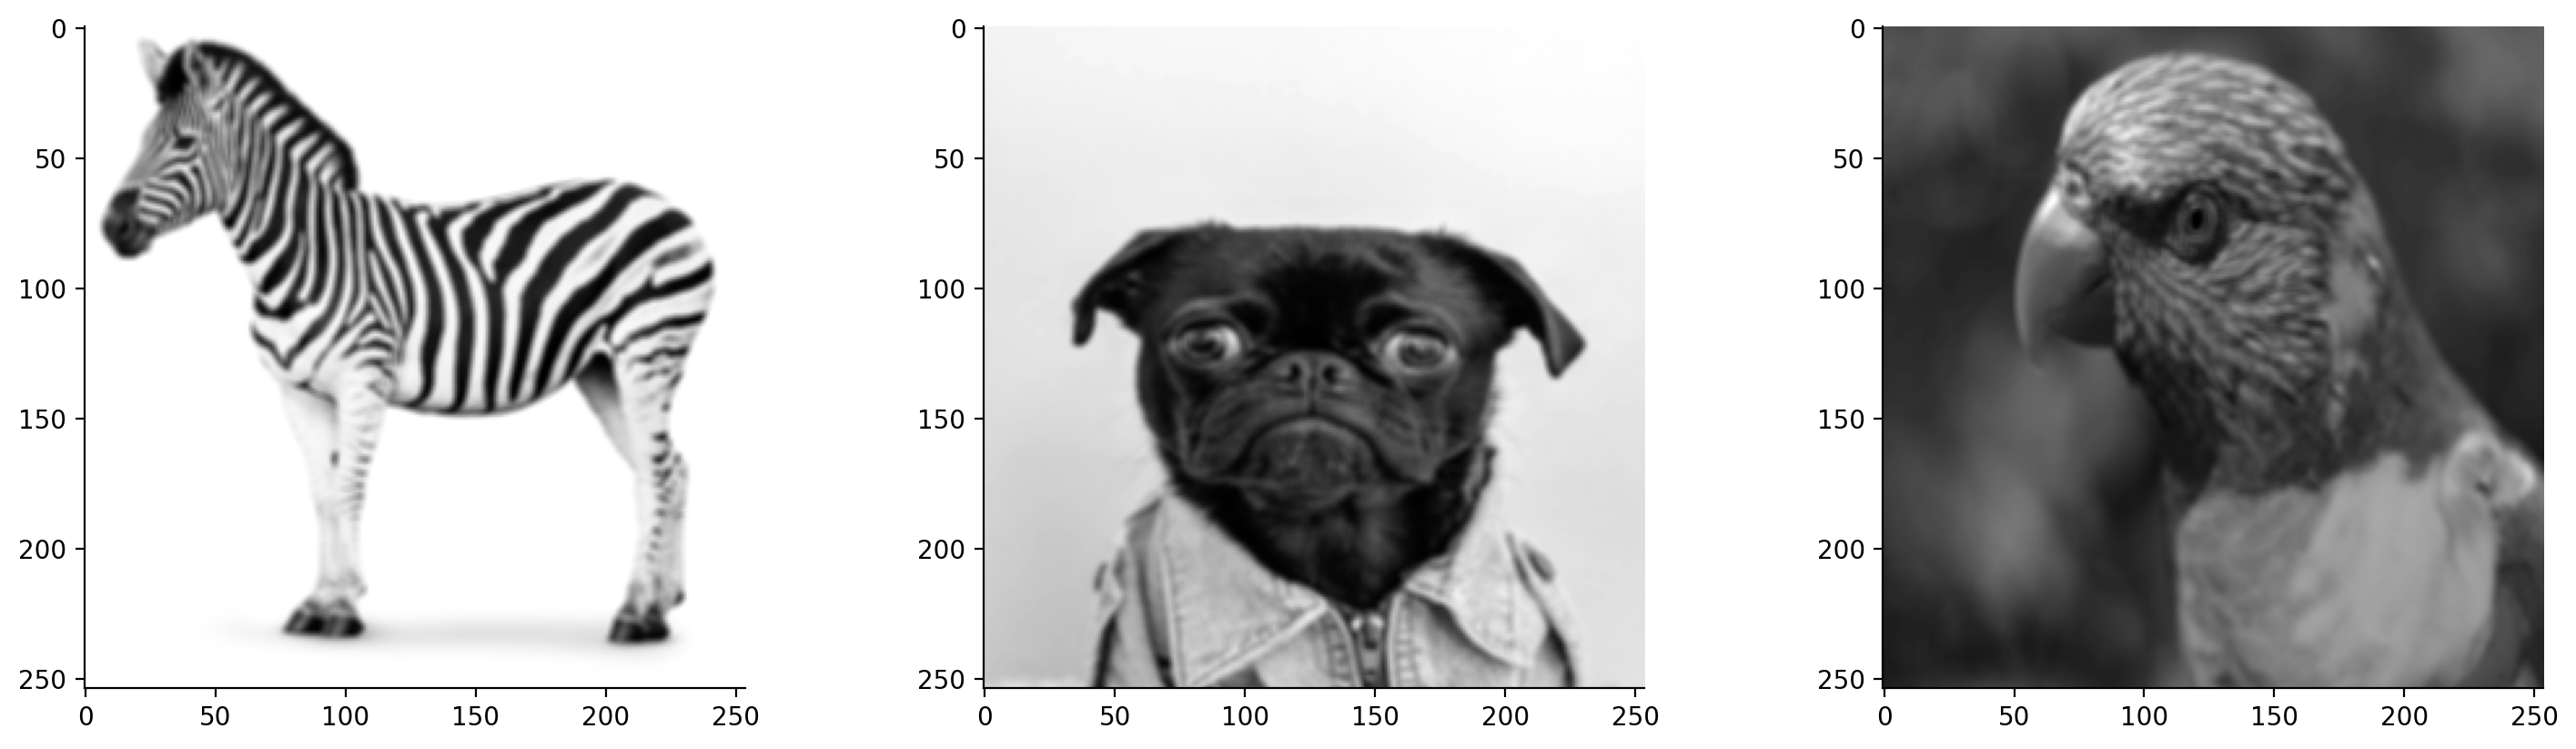

In [14]:
plot_my_img(img_avg,cmap="gray")

Note your observations:



#### Edge detectors

We apply this filter on the output of the avg filter so we'll extract only the significant edges

In [15]:
#question : pourquoi le rehaping des filtres et pourquoi ces valeurs. utilsation de expand_dims ?
#question pourquoi pas possible d'utiliser 2 convolutions a la suite
# TODO:
# - apply the two following filters to the output tensors, i.e. dog_avg_tensor / zebra_avg_tensor 
# (make sure the dimensions are correct)
# - show the results
# - compare it to the input image
filter1 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]], dtype=np.float32)
filter2 = np.array([[-1, 0, 1],
                    [-2, 0, 1],
                    [-1, 0, 1]], dtype=np.float32)

edg_filter1_tensor = tf.constant(filter1.reshape(3, 3, 1,1))
edg_filter2_tensor = tf.constant(filter2.reshape(3, 3, 1,1))

img_tensor_edg = map(lambda x: tf.reshape(tf.constant(x, dtype=np.float32), (batch_sz, h, w, n_channels)), img_avg)
#edg_tensor = map((lambda y: tf.nn.convolution(y, edg_filter2_tensor)), map(lambda x: tf.nn.convolution(x, edg_filter1_tensor),img_tensor_edg))
edg_tensor1 = map(lambda x: tf.nn.convolution(x, edg_filter1_tensor),img_tensor_edg)
img_avg_edg1 = list(map(lambda x: kp_image.array_to_img(tf.cast(x[0], 'uint64'), scale=False),edg_tensor1))
plot_my_img(img_avg_edg1,cmap="gray")

edg_tensor2 = map((lambda y: tf.nn.convolution(y, edg_filter2_tensor)),img_avg_edg1) 
img_avg_edg12 = list(map(lambda x: kp_image.array_to_img(tf.cast(x[0], 'uint64'), scale=False),edg_tensor2))

plot_my_img(img_avg_edg12,cmap="gray")


ValueError: ignored

<details>
<summary markdown='span'>View solution
</summary>

```python
 # Convert the numpy array to a tensor
filter1_tensor = tf.constant(filter1.reshape((3, 3, 1, 1)))
filter2_tensor = tf.constant(filter2.reshape((3, 3, 1, 1)))

# Operator to apply a convolutional filter
img_processed_tensor = tf.nn.convolution(zebra_avg_tensor, filter1_tensor)
img_processed = kp_image.array_to_img(tf.cast(img_processed_tensor[0], 'uint64'), scale=False)

plt.imshow(img_processed, cmap='gray')
plt.show()

# Operator to apply a convolutional filter
img_processed_tensor = tf.nn.convolution(zebra_avg_tensor, filter2_tensor)
img_processed = kp_image.array_to_img(tf.cast(img_processed_tensor[0], 'uint64'), scale=False)

plt.imshow(img_processed, cmap='gray')
plt.show()
```

In [16]:
# [Extra]: change the size of the avg filter and observe how the edges detection is affected (try also without)

#### Sharpen filter [OPTIONAL]

This filter aims at sharpening the image, i.e. it reinforces the edges

In [27]:
print(list(img_tensor))
print (globals().keys())

[]
dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', '_sh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'EPOCHS', '_i2', '_i3', 'Image', 'os', 'resize', 'np', 'pd', 'sns', 'plt', 'train_test_split', 'tf', 'kp_image', '_i4', 'img_dir', '_exit_code', '_i5', '_i6', 'zebra_path', 'dog_path', 'bird_path', 'zebra_img', 'dog_img', 'bird_img', 'img_list', 'nb_img', '_i7', 'plot_my_img', '_i8', 'img_array', '_i9', 'h', 'w', 'n_channels', 'img_array_resized', '_i10', '_i11', 'batch_sz', 'img_tensor', '_i12', 'size', 'avg_filter', 'avg_filter_tensor', '_i13', 'avg_tensor', 'img_avg', '_i14', '_i15', 'filter1', 'filter2', 'edg_filter1_tensor', 'edg_filter2_tensor', 'img_tensor_edg', 'edg_tensor1', '_i16', '_i17', 'sharpening_filter', '_i18', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27'])


In [31]:
# TODO: same exercise with the sharpening filter
sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32) / 3
#print(list(img_tensor))
#dog_avg_tensor=list(img_tensor)[1]
dog_avg_tensor = dog

sharpening_tensor = tf.constant(sharpening_filter)
 
# Operator to apply a convolutional filter
img_processed_tensor = tf.nn.convolution(dog_avg_tensor, tf.reshape(sharpening_tensor, (3, 3, 1, 1)))
img_processed = kp_image.array_to_img(tf.cast(img_processed_tensor[0], 'uint64'), scale=False)
 
plt.imshow(img_processed, cmap='gray')
plt.show()


NotFoundError: ignored

<details>
<summary markdown='span'>View solution
</summary>

```python
# Convert the numpy array to a tensor
sharpening_tensor = tf.constant(sharpening_filter)

# Operator to apply a convolutional filter
img_processed_tensor = tf.nn.convolution(dog_avg_tensor, tf.reshape(sharpening_tensor, (3, 3, 1, 1)))
img_processed = kp_image.array_to_img(tf.cast(img_processed_tensor[0], 'uint64'), scale=False)

plt.imshow(img_processed, cmap='gray')
plt.show()
```

# CNN Network


You've seen what's inside a CNN filter, now you'll build a network with a large number of these filters and train them so each filter will adapt itself to detect a specific pattern relevant to solve a given task.

We first work on the Cifar 100 dataset you already used with a fully connected network. It is often used as a baseline in Computer Vision https://www.cs.toronto.edu/~kriz/cifar.html and available for download in Keras.

## Data

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 12s 0us/step


#### First look at the data

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
classes : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
total : 100


array([[74],
       [59],
       [70],
       [87],
       [59],
       [84],
       [64],
       [52],
       [42],
       [64],
       [ 8],
       [17],
       [47],
       [65],
       [21],
       [22],
       [81],
       [11],
       [24]])

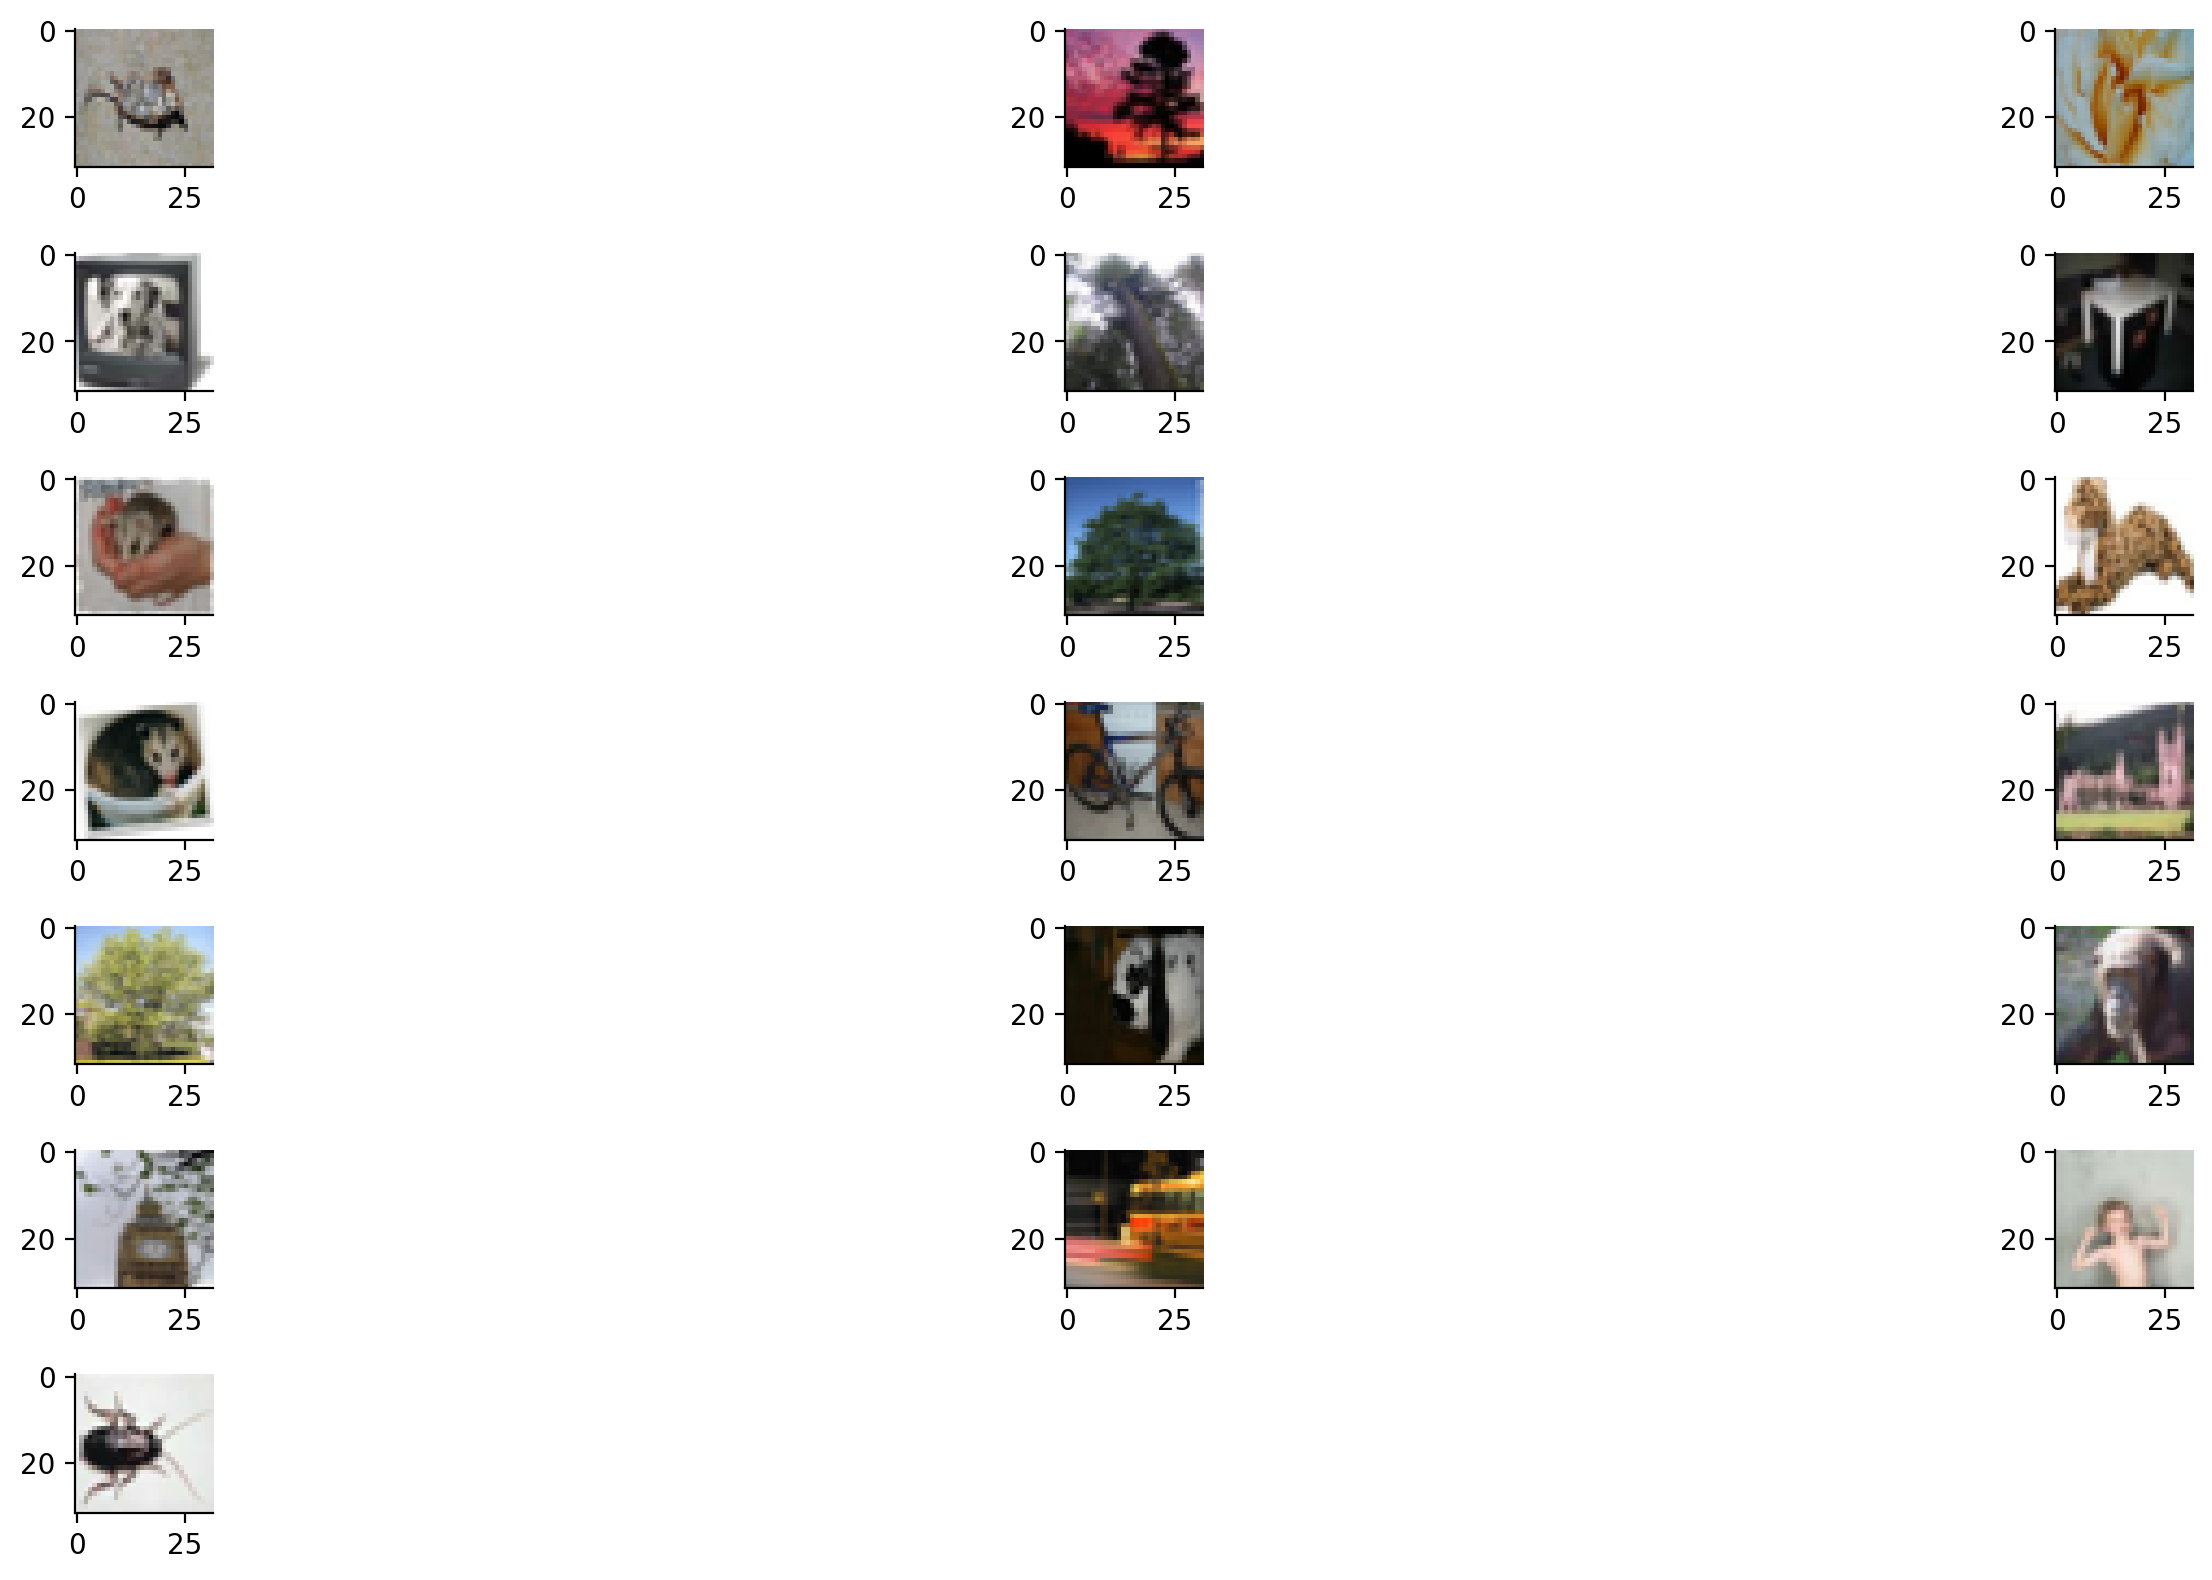

In [33]:
# TODO: Check the output (types, shape, number of classes)
print(type(x_train))
print(x_train.shape)
print("classes : {}".format(np.unique(y_train)))
print("total : {}".format(len(np.unique(y_train))))
plot_my_img([x_train[i] for i in range(20,39)])
y_train[20:39]


<details>
<summary markdown='span'>View solution
</summary>

```python
classes_values = np.unique(y_train)
num_outputs = len(classes_values)
print(num_outputs)
```

#### Formatting the data

In [34]:
# TODO: Make the input continuous
x_train_continuous = x_train / 255
x_test_continuous = x_test / 255


<details>
<summary markdown='span'>View solution
</summary>

```python
x_train_continuous = X_train / 255
x_test_continuous = x_test / 255
```

## Modeling

#### Baseline Model

In [39]:
#Question / Revoir : arguments de conv2D
# TODO: Define a simple model with 2 hidden CNN layers and one hidden Dense layer
# before the output layer.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten


model = Sequential()
model.add(Conv2D(16, 3, 1, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, 1, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu') )
model.add(Dense(len(np.unique(x_train)),activation="softmax"))
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

<details>
<summary markdown='span'>Hints
</summary>
Always start by using smaller filters is to collect as much local information as possible, and then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information. 
</details>

<details>
<summary markdown='span'>Hints
</summary>
Use an odd kernel_size
</details>

<details>
<summary markdown='span'>Hints
</summary>
Use a max-pooling to reduce the number of features sent to the Dense layer to prevent from overfitting
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
layers = [
    tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
]

model = tf.keras.Sequential(layers)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```


In [42]:
# TODO: train the model for 15 epochs
EPOCHS = 15
history = model.fit(x=x_train_continuous, y=y_train, batch_size = 64, epochs = EPOCHS, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 5s 8ms/step - loss: 1.6439 - accuracy: 0.5513 - val_loss: 2.8464 - val_accuracy: 0.3526
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 1.4903 - accuracy: 0.5890 - val_loss: 2.9076 - val_accuracy: 0.3543
Epoch 3/15
625/625 [==============================] - 5s 8ms/step - loss: 1.3663 - accuracy: 0.6183 - val_loss: 3.0376 - val_accuracy: 0.3478
Epoch 4/15
625/625 [==============================] - 5s 8ms/step - loss: 1.2657 - accuracy: 0.6471 - val_loss: 3.1299 - val_accuracy: 0.3498
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 1.1723 - accuracy: 0.6700 - val_loss: 3.1995 - val_accuracy: 0.3403
Epoch 6/15
625/625 [==============================] - 5s 8ms/step - loss: 1.0900 - accuracy: 0.6897 - val_loss: 3.3269 - val_accuracy: 0.3399
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 1.0101 - accuracy: 0.7097 - val_loss: 3.4775 - val_accuracy: 0.3383
Epoch 

<details>
<summary markdown='span'>View solution
</summary>

```python
num_epochs = 15

history = model.fit(x_train_continuous, y_train,
                    batch_size=128,
                    epochs=num_epochs,
                    validation_split=0.2)
```

1563/1563 - 4s - loss: 1.3285 - accuracy: 0.7699
Train model accuracy: 0.7698799967765808
313/313 - 1s - loss: 4.9169 - accuracy: 0.3266
Test model accuracy: 0.32659998536109924


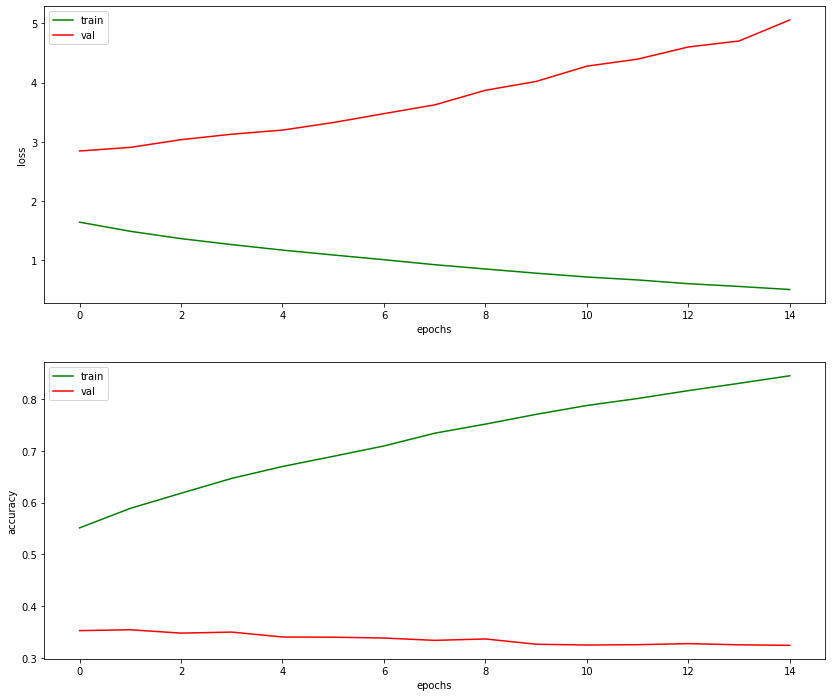

In [43]:
# TODO: Evaluate your model and plot the metrics
train_loss, accuracy_train_nn = model.evaluate(x_train_continuous, y_train, verbose=2)
print(f'Train model accuracy: {accuracy_train_nn}')
 
#  print test metrics of your model
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')
 
# check how your metrics evolve during training
history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df.tail()
 
fig, axes = plt.subplots(2, 1, figsize=(14, 12))
 
for i, metric in enumerate(['loss', 'accuracy']):
  ax = axes[i]
  history_df.plot('epochs', f'{metric}', color='g', label='train', ax=ax)
  history_df.plot('epochs', f'val_{metric}', color='r', label='val', ax=ax)
  ax.set_ylabel(metric)
plt.show()

<details>
<summary markdown='span'>View solution
</summary>

```python
# print training metrics of your model
train_loss, accuracy_train_nn = model.evaluate(x_train_continuous, y_train, verbose=2)
print(f'Train model accuracy: {accuracy_train_nn}')

#  print test metrics of your model
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')

# check how your metrics evolve during training
history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df.tail()

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, metric in enumerate(['loss', 'accuracy']):
  ax = axes[i]
  history_df.plot('epochs', f'{metric}', color='g', label='train', ax=ax)
  history_df.plot('epochs', f'val_{metric}', color='r', label='val', ax=ax)
  ax.set_ylabel(metric)
plt.show()
```

Comment the curve: Why is the test switching trend ? What could we do to improve our peformances on the test set?

#### Early stopping [OPTIONAL]

Apply early stopping to reduce the overfitting

In [45]:
# TODO: Re-use the precedent model and train it with the early stopping callbacks function of Keras

patience = 4
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)
 
# Training

model = Sequential()
model.add(Conv2D(16, 3, 1, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, 1, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(256, activation='relu') )
model.add(Dense(len(np.unique(x_train)),activation="softmax"))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
EPOCHS = 20
 
history = model.fit(x_train_continuous, y_train,
                    batch_size=128,
                    epochs=EPOCHS,
                    validation_split=0.2,
                    callbacks=[es])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

<details>
<summary markdown='span'>Hints
</summary>
Check the early stopping callbacks object https://keras.io/callbacks/earlystopping and you can simply add it as an arguement to your call to `model.fit()`
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
layers = [
    tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
]

patience = 4
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)

# Training
model = tf.keras.Sequential(layers)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 20

history = model.fit(x_train_continuous, y_train,
                    batch_size=128,
                    epochs=num_epochs,
                    validation_split=0.2,
                    callbacks=[es])
```

In [ ]:
# TODO: print training metrics of your model

<details>
<summary markdown='span'>View solution
</summary>

```python
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')
```

You've found out when to stop training in order not to overfit to your train data, but you fitted your model only on 80% of the training data. Don't forget that the data is your most important source of information so you should use the maximum of it.

How to do this? You can get the optimized number of epoch to fit your model and then use it when fitting your model on the whole train set !

In [ ]:
# TODO: extract the number of epoch at which the early stopping triggered

<details>
<summary markdown='span'>Hints
</summary>
Retrieve from it the patience since you want only the number of steps needed to reach the best performances on your validation set
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python

num_epoch_optimized = es.stopped_epoch - patience
print(num_epoch_optimized)
```

In [ ]:
# TODO: Fit your model on all your train data this time with the optimized
# number of epochs  

<details>
<summary markdown='span'>View solution
</summary>

```python
layers = [
    tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
]

# Training
model = tf.keras.Sequential(layers)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_continuous, y_train,
                    batch_size=128,
                    epochs=num_epoch_optimized)
```

In [ ]:
# TODO: Evaluate your model

<details>
<summary markdown='span'>View solution
</summary>

```python
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')
```

### Dropout

Another method to prevent overfitting is the Dropout layer as we saw in the lecture. It's available in Keras, you just need to set the fraction rate of the units randomly set to 0 at each epoch of the training loop.

In [ ]:
# TODO: re-use the same architecture and adds Dropout Layers. First do it
#   without the early stopping to see its effect and to compare it correctly.

<details>
<summary markdown='span'>Hints
</summary>
A reasonable rate is often 0.5 or 0.6. 
</details>

<details>
<summary markdown='span'>Hints
</summary>
You should add a Dropout after the deeper layers at least
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
layers = [
    tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
]

# Training
model = tf.keras.Sequential(layers)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 20

history = model.fit(x_train_continuous, y_train,
                    batch_size=128,
                    epochs=num_epochs,
                    validation_split=0.2,)
```

In [ ]:
# TODO: Evaluate your model


<details>
<summary markdown='span'>View solution
</summary>

```python
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')


history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df.tail()

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, metric in enumerate(['loss', 'accuracy']):
  ax = axes[i]
  history_df.plot('epochs', f'{metric}', color='g', label='train', ax=ax)
  history_df.plot('epochs', f'val_{metric}', color='r', label='val', ax=ax)
  ax.set_ylabel(metric)
plt.show()
```

What are your observations? Could you improve even more the use of the Dropouts?

Yes ! You could now train a bit longer your model and combine it with an early stopping since the overfitting is reduced. You can also adapt the rate of your Dropout layers to this task. This rate is an __hyperparameter__ of your model so you can optimize it with a cross-validation.

### Data Augmentation

Another option to prevent overfitting is to augment your data set. Since you're working with images, you can actually apply any kind of transformation that won't affect to much the content of your images so it will help us to generalize more to new data

These are just a few of the options available (for more, see the [Keras documentation](https://keras.io/preprocessing/image/). Let's quickly go over what we just wrote:

- `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.
- `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- `shear_range` is for randomly applying shearing transformations.
- `zoom_range` is for randomly zooming inside pictures.
- `horizontal_flip` is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

You can have a look at our augmented images.


In [ ]:
# TODO: use the ImageDataGenerator object of Keras and set through its arguments the transformations you want


<details>
<summary markdown='span'>Hints
</summary>
First you need to defind the data generator and then you need to extract from it an image iterator with the .flow() method
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_iterator = train_datagen.flow(X_train, y_train, batch_size=128, seed=42)
```

In [ ]:
# TODO: Train your model on the augmented dataset


<details>
<summary markdown='span'>View solution
</summary>

```python
layers = [
    tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='softmax')
]

# Training
model = tf.keras.Sequential(layers)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

num_epochs = 20

history = model.fit(x=train_iterator,
                    epochs=num_epochs)
```

In [ ]:
# TODO: Model evaluation

<details>
<summary markdown='span'>Hints
</summary>
Retrieve from it the patience since you want only the number of steps needed to reach the best performances on your validation set
</details>

<details>
<summary markdown='span'>View solution
</summary>

```python
# print test metrics of your model
test_loss, accuracy_test_nn = model.evaluate(x_test_continuous, y_test, verbose=2)
print(f'Test model accuracy: {accuracy_test_nn}')

# check how your metrics evolve during training to see if the Dropout layers 
#   prevented overfitting
history_df = pd.DataFrame(history.history).reset_index().rename(columns={'index': 'epochs'})
history_df.tail()

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, metric in enumerate(['loss', 'accuracy']):
  ax = axes[i]
  history_df.plot('epochs', f'{metric}', color='g', label='train', ax=ax)
  history_df.plot('epochs', f'val_{metric}', color='r', label='val', ax=ax)
  ax.set_ylabel(metric)
plt.show()
```

### Use them all !

Combine the three previous methods all together : early stopping + Dropout + Data Augmentation to see if you can get an even better performance on the test set

In [ ]:
# TODO

Here are some tips on what you could do:

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Other nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add Dropout layer https://keras.io/layers/core/
   * Add Batch Normalisation layer https://keras.io/layers/normalization/
   * Add some L2 weight norm to the loss function
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.